In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 读入数据，生成散点图，提现要求加薪和实际加薪的情况

In [2]:
employees=pd.read_csv("hfda_ch10_employees.csv")

### 1. 经过观察，有大量没有提出要求而薪水产生了变化的数据，移除这部分数据

In [14]:
employees_req=employees[employees["negotiated"]]

### 2. 产生散点图

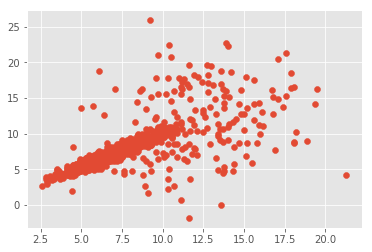

In [15]:
plt.scatter(employees_req["requested"],employees_req["received"])

### 3. 在图上加薪要求的平均值和中位数值，平均数使用红色线，中位数值使用蓝色线

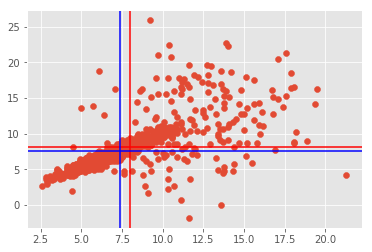

In [19]:
request_mean=employees_req["requested"].mean()
request_median=np.median(employees_req["requested"])
received_mean=employees_req["received"].mean()
received_median=np.median(employees_req["received"])

plt.scatter(employees_req["requested"],employees_req["received"])
plt.axvline(request_mean,c="r")
plt.axhline(received_mean,c="r")
plt.axvline(request_median,c="b")
plt.axhline(received_median,c="b")

## 计算要求加薪额与实际加薪额之间的相关系数

In [21]:
from scipy.stats import linregress
lin_result=linregress(employees_req["requested"],employees_req["received"])
r_value=lin_result[2]
print("the r value between requested and received is %f" %r_value)

the r value between requested and received is 0.665648


### 根据r值可以判断两者是正相关

In [32]:
print(lin_result)

LinregressResult(slope=0.7250664121254519, intercept=2.3121277105516347, rvalue=0.6656481025557182, pvalue=5.323697660272285e-129, stderr=0.025731277095610777)


### 所以线性回归方程为  
<img src="http://chart.apis.google.com/chart?cht=tx&chl=\Large y=0.7*x+2.3" />

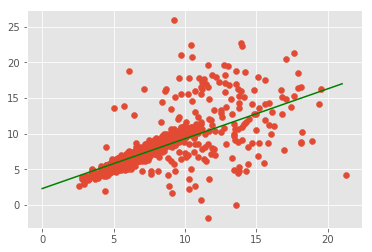

In [33]:
plt.scatter(employees_req["requested"],employees_req["received"])
x=list(range(23))
y=[0.7*i+2.3 for i in x]
plt.plot(x,y,c="g")

### 上图为数据集的回归线

### 将数据集以加薪要求10%分为两个部分，分别进行线性回归

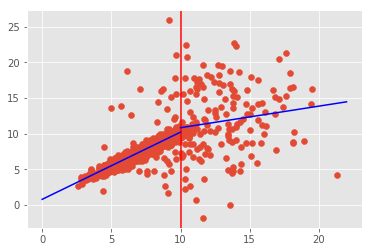

In [43]:
employees_below_10=employees_req[employees_req["requested"]<=10]
employees_above_10=employees_req[employees_req["requested"]>10]

lin_result_below_10=linregress(employees_below_10["requested"],employees_below_10["received"])
lin_result_above_10=linregress(employees_above_10["requested"],employees_above_10["received"])

plt.scatter(employees_req["requested"],employees_req["received"])
plt.axvline(10,c="r")

x_b=list(range(11))
y_b=[lin_result_below_10[0]*i+lin_result_below_10[1] for i in x_b]
plt.plot(x_b,y_b,c="b")

x_a=list(range(10,23))
y_a=[lin_result_above_10[0]*i+lin_result_above_10[1] for i in x_a]
plt.plot(x_a,y_a,c="b")

In [44]:
print(lin_result_below_10)
print(lin_result_above_10)

LinregressResult(slope=0.9424946065111157, intercept=0.793346774752897, rvalue=0.7201493258495, pvalue=6.588019554839197e-134, stderr=0.031518353523814185)
LinregressResult(slope=0.3026090458486787, intercept=7.813403322861374, rvalue=0.16316758203402587, pvalue=0.03457617872096253, stderr=0.142015052006948)
